# 1. 第一阶段 数据清理和爬取

## 1.1 数据清理 筛选出所有美国记者的信息 

In [1]:
import pandas as pd
df = pd.read_csv('Data_Journalism.csv')# 还是需要美国的

In [14]:
# 清理出所有的美国的信息，去掉其他的 并写成DataFrame
for i in df['Location']:
    if 'United States' not in i:
        number = df[df['Location'] == i]['Unnamed: 0'].tolist()[0] # 运用index定位
        df.drop([number], inplace=True)
df['Twitter'] #46条美国推特网址

In [ ]:
# 第二种方法 筛选所有美国记者的推特网址46条 ps：仅供参考！
T_list =[]
for i in df['Location'].tolist():
    if 'United States' in i:
        T = df[df['Location'] == '{}'.format(i)]['Twitter'].tolist()
        T_list.extend(T)
T_list 

## 1.2 爬取推特文本 4000多条推特

In [65]:
# 爬取单人的并封装函数
from selenium import webdriver
import time
browser = webdriver.Chrome() 
browser.get('http://www.twitter.com/smelendez')

# 翻页五次 每人100条推特信息 
def T_scraper(i):
    browser.get(i)
    for i in range(5):
        time.sleep(1)
        browser.execute_script("window.scrollTo(0,100000);")# 不管翻页多大也只是往下拉 每次最多多拿20个elments
        time.sleep(0.5)

    element = browser.find_elements_by_css_selector('.TweetTextSize.TweetTextSize--normal') 
    global All_T_text
    All_T_text = []
    for i in element:
        T_text = i.text # 直接这里用split的话 后面没办法保留需要的词
        
        All_T_text.append(T_text)
    
    return All_T_text

In [67]:
# 爬取46条网址并全部切割以后放入All_words
from selenium.common.exceptions import WebDriverException

browser = webdriver.Chrome() 
All_words = []
for i in T_list:
    try:
        T_scraper(i)
        All_words.extend(All_T_text)
    except WebDriverException:
        print(i)

In [ ]:
# 把所有words写进txt
f = open('test.txt','w')
for i in All_words:
    f.write(i)

# 2. 第二阶段 统计词频与制图

## 2.1 文本处理

In [174]:
# 去词并封装函数
def stop_words(words):
    word_list = []
    with open ('stopword.txt','r') as s:
        list_stop_words = s.read().split()
    for i in words:
        if i not in list_stop_words:
            word_list.append(i)
    return word_list

# 定义函数去除多余字符
def getText(txt): 
    text=open(txt,"r").read() 
    text=text.lower()                 
    for ch in '`!@#~$%^&*()_+-=*/{}[];,./?<>':
        text=text.replace(ch," ")  
    return text

## 2.2 词频图统计

In [181]:
import matplotlib.pyplot as plt                          
from PIL import Image
from scipy.misc import imread 
import pandas as pd 
import numpy as np 
import seaborn as sns
import jieba
import wordcloud
from pylab import mpl 
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

In [ ]:
# TOP20 words
def word_count(word_list):
    word_count = pd.Series(word_list).value_counts().sort_values(ascending=False)[0:20]  
    fig = plt.figure(figsize=(16,8))  
    x = word_count.index.tolist()  
    y = word_count.values.tolist()  
    sns.barplot(x, y, palette="Blues_r")   
    plt.title('Top20 Words')  
    plt.ylabel('Count')  
    sns.despine(bottom=True)   
    plt.show() 
    
# All words 
def cloud_words(i):
    image = Image.open('Python.png')
    graph = np.array(image)
    wc = WordCloud(mode='RGBA',background_color='white',max_words=2000,max_font_size=300,random_state=42,mask=graph)
    wc.generate(' '.join(word_list))
    img = imread('Python.png')  
    cloud_colors = wordcloud.ImageColorGenerator(np.array(img))
    cloud_colors.default_color = [0.6,0.6,0.6]
    wc.recolor(color_func=cloud_colors)
    plt.figure(figsize=(12,12))
    plt.imshow(wc.recolor(color_func=cloud_colors), interpolation='bilinear')
    plt.axis("off")
    plt.title('Twitter', loc='Center', fontsize=20)
    plt.show()

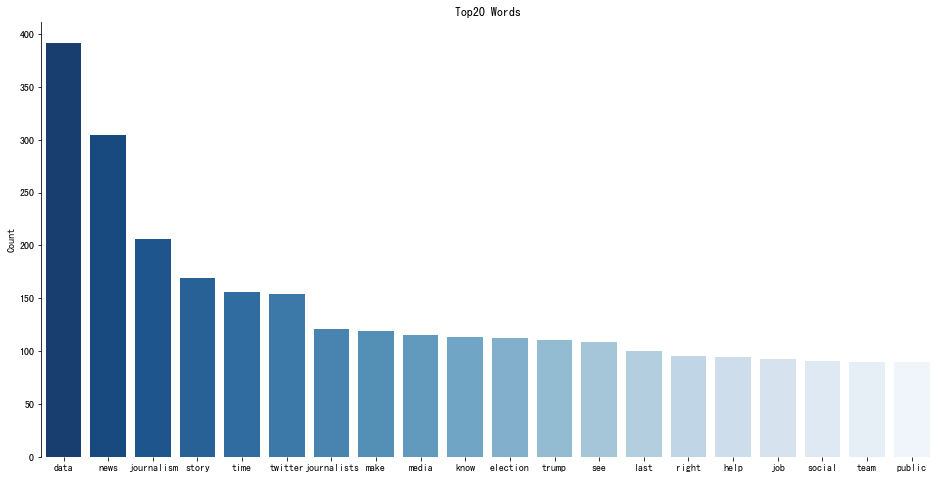

In [182]:
test=getText('test.txt')  
words =test.split() 
word_list = stop_words(words)
word_count(word_list)
# data就不说了 通过其他的词应该可以看出来 这些记者对于政治的关注度非常高 election; trump; public, etc.

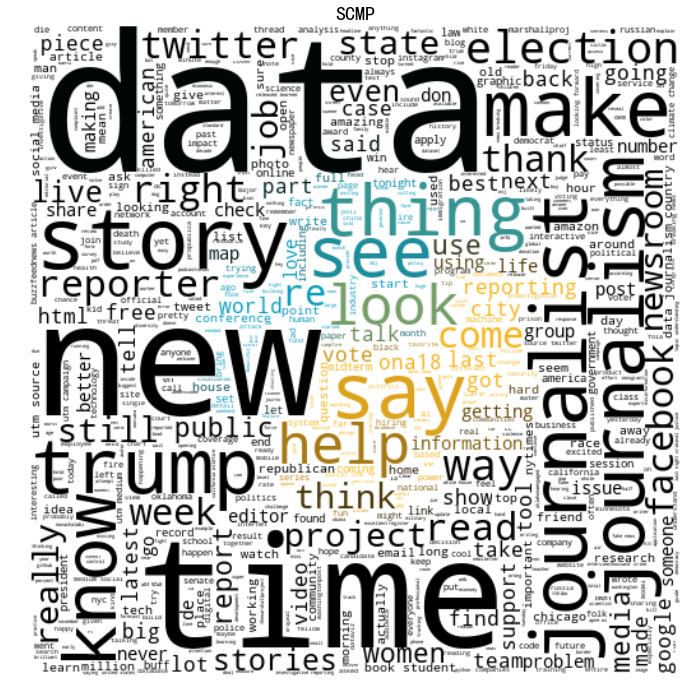

In [114]:
cloud_words(i) # 弄出来风格奇特的词云图 好像还行